In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns


In [99]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling-encoded.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   male                  1362 non-null   int64  
 1   dateOfBirth           1362 non-null   float64
 2   dateOfDeath           1362 non-null   float64
 3   book1                 1362 non-null   int64  
 4   book2                 1362 non-null   int64  
 5   book3                 1362 non-null   int64  
 6   book4                 1362 non-null   int64  
 7   book5                 1362 non-null   int64  
 8   isMarried             1362 non-null   int64  
 9   isNoble               1362 non-null   int64  
 10  age                   1362 non-null   float64
 11  numDeadRelations      1362 non-null   int64  
 12  boolDeadRelations     1362 non-null   int64  
 13  isPopular             1362 non-null   int64  
 14  popularity            1362 non-null   float64
 15  isAlive              

Standarizing only chosen variables

In [101]:
scaler = StandardScaler()

selected_columns = ['age', 'dateOfBirth', 'dateOfDeath', 'popularity', 'house_encoded']

scaled_data = scaler.fit_transform(df[selected_columns])
df_scaled = df.copy()
df_scaled[selected_columns] = scaled_data



## k-Means

Optimal number of clusters for k-Means

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [103]:
def metrics_plots(max_k=10, df=None):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 

    plt.figure(figsize=(15, 10))
    for i in range(len(list_scores)):
        plt.subplot(2, 2, i+1)
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')

    plt.tight_layout()
    plt.show()


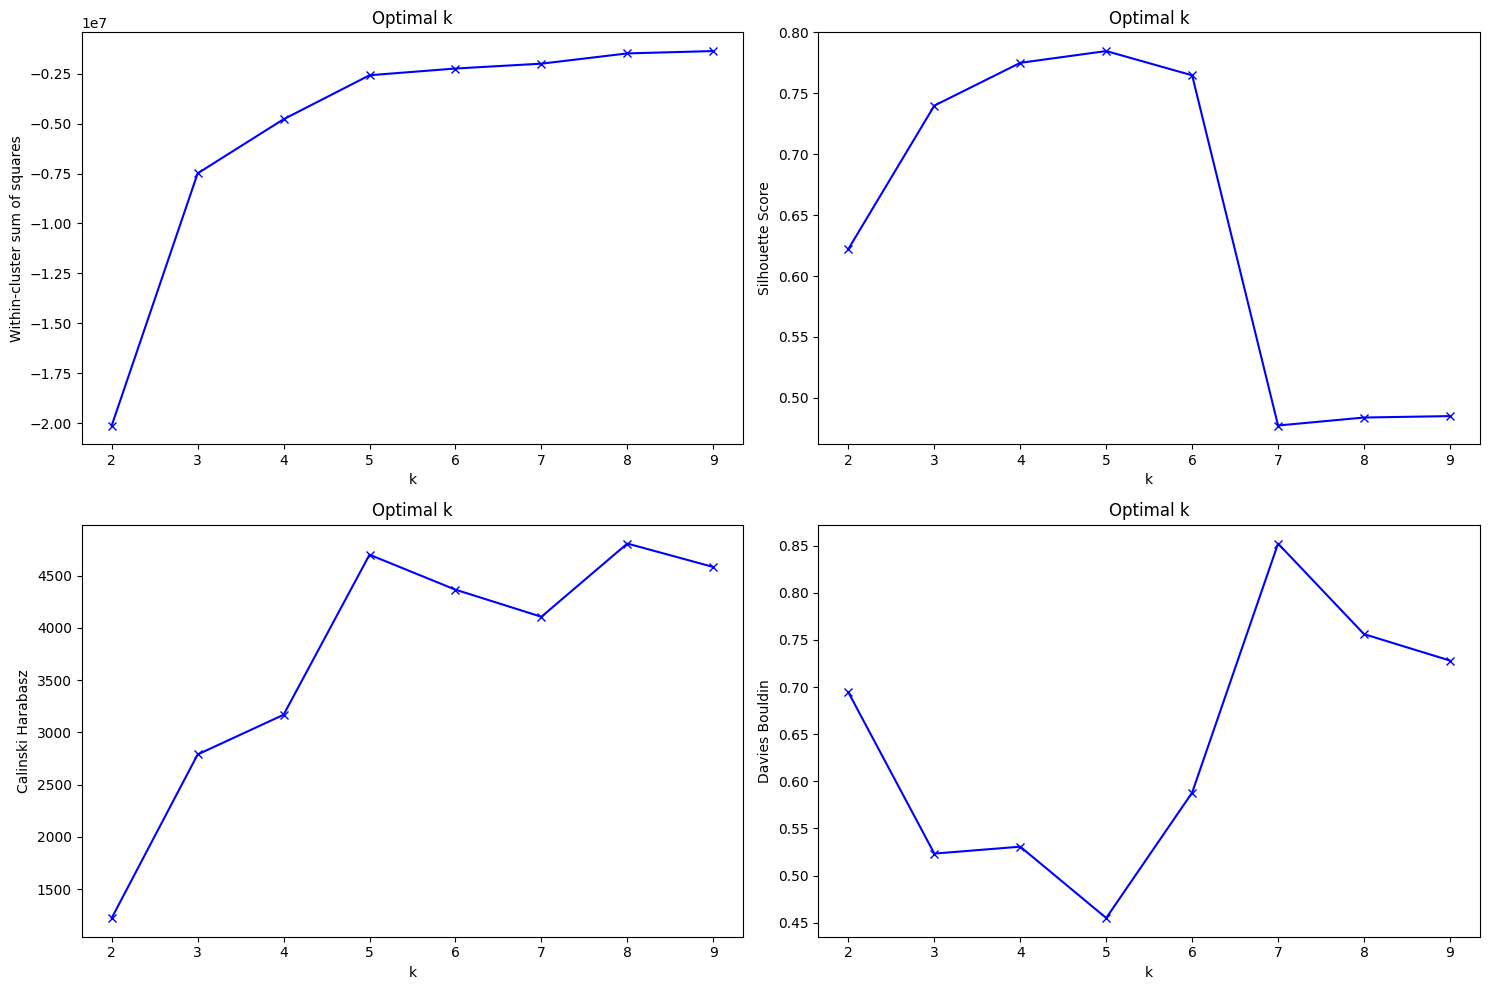

In [104]:
metrics_plots(max_k=10, df=df)

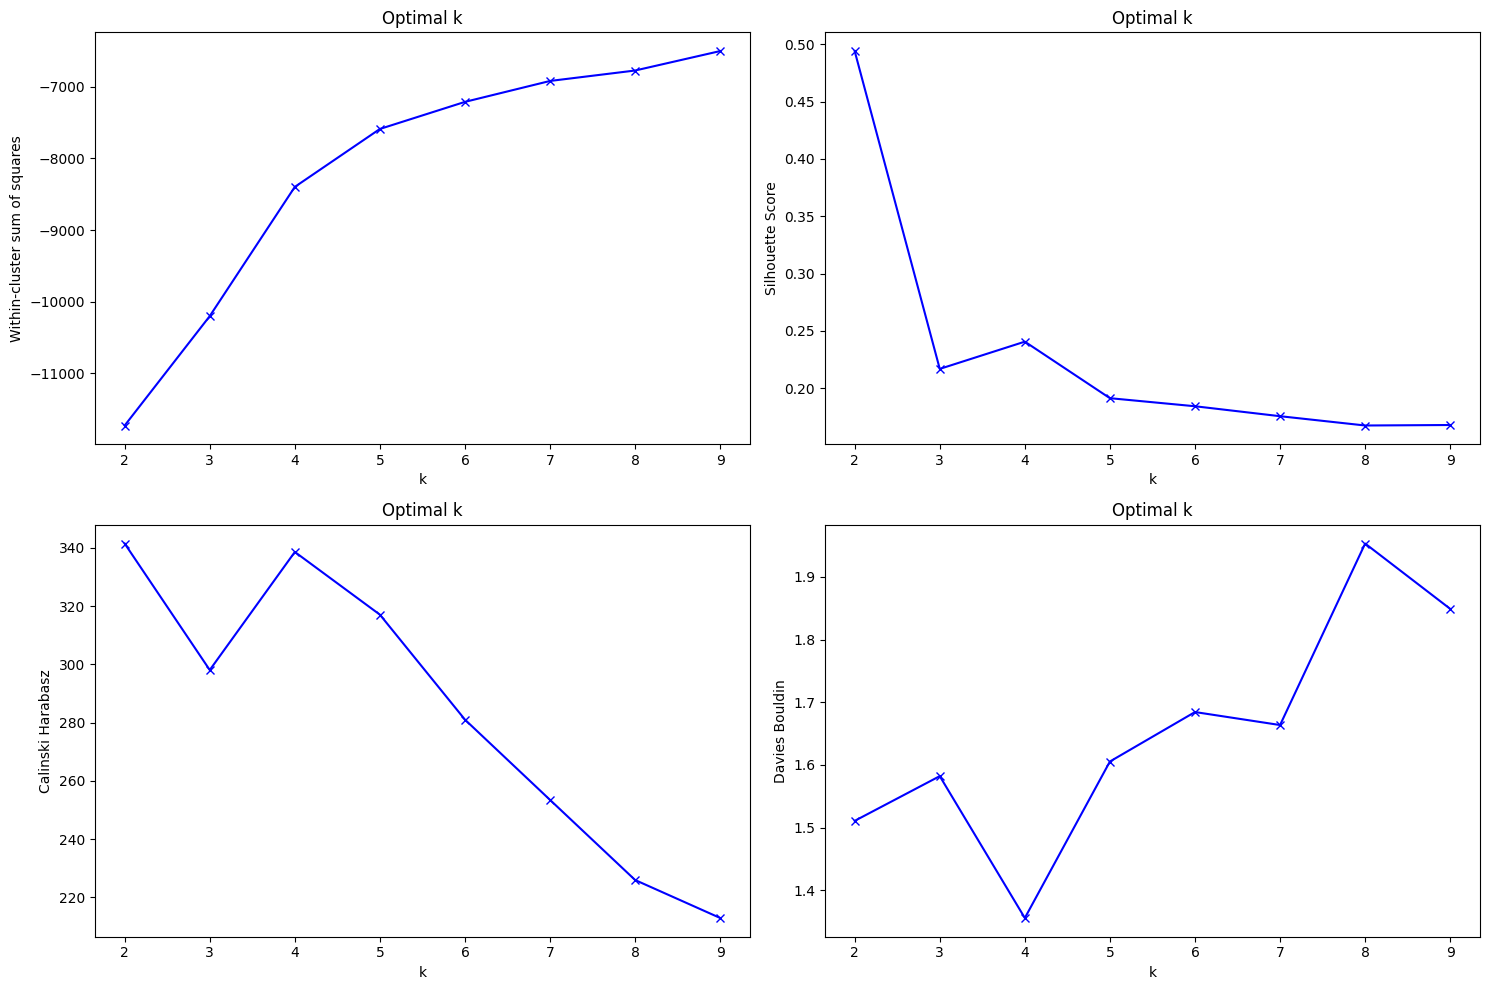

In [105]:
metrics_plots(max_k=10, df=df_scaled)

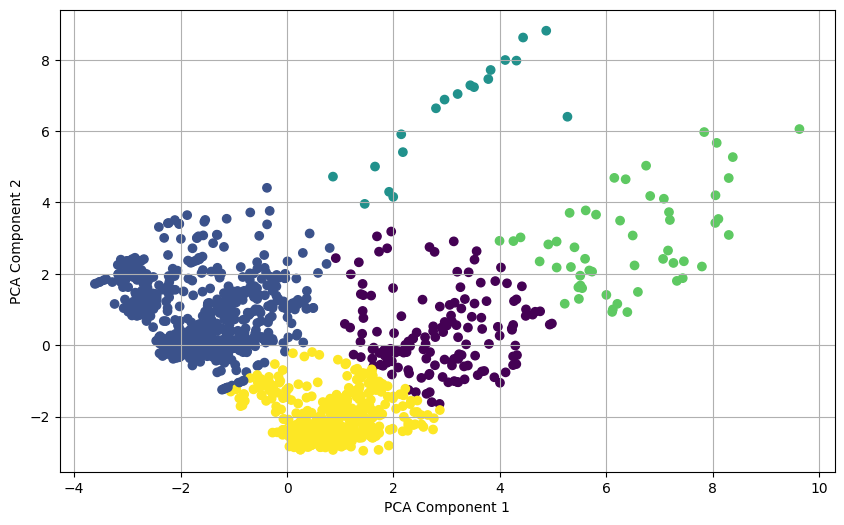

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


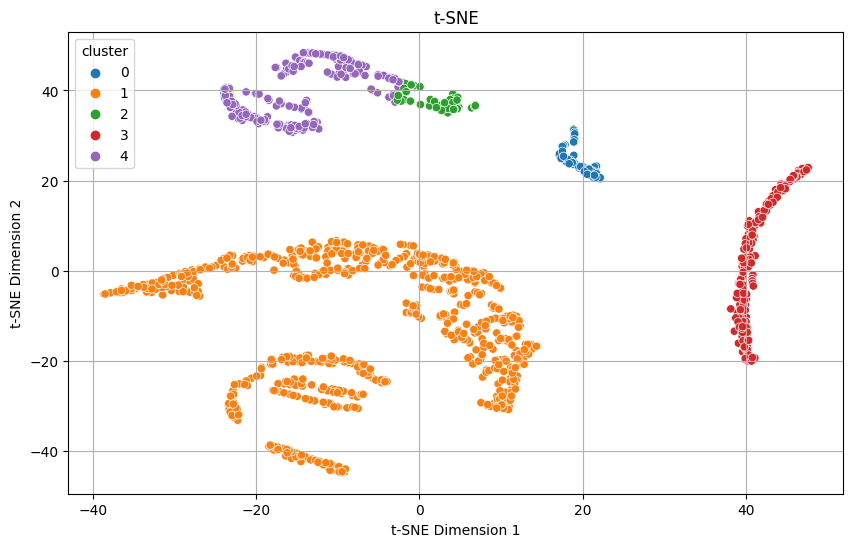

In [107]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

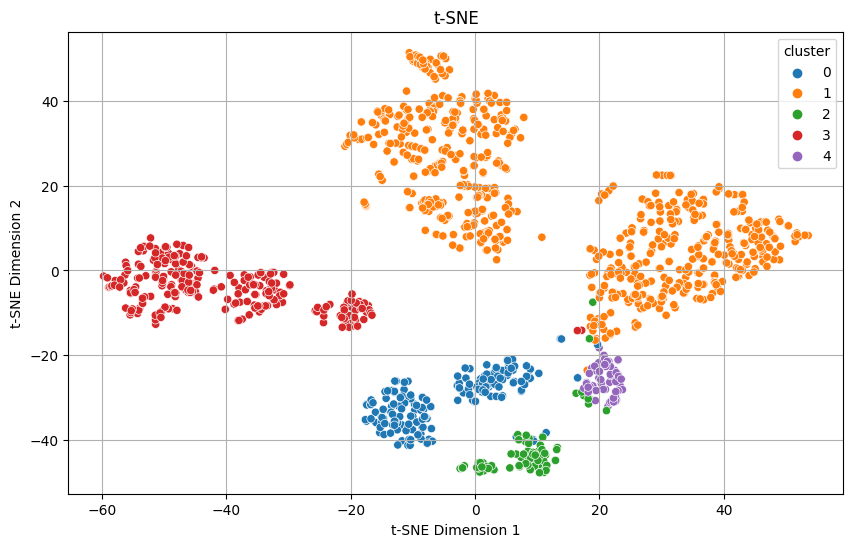

In [108]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df_scaled)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df_scaled['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

## Mini Batch

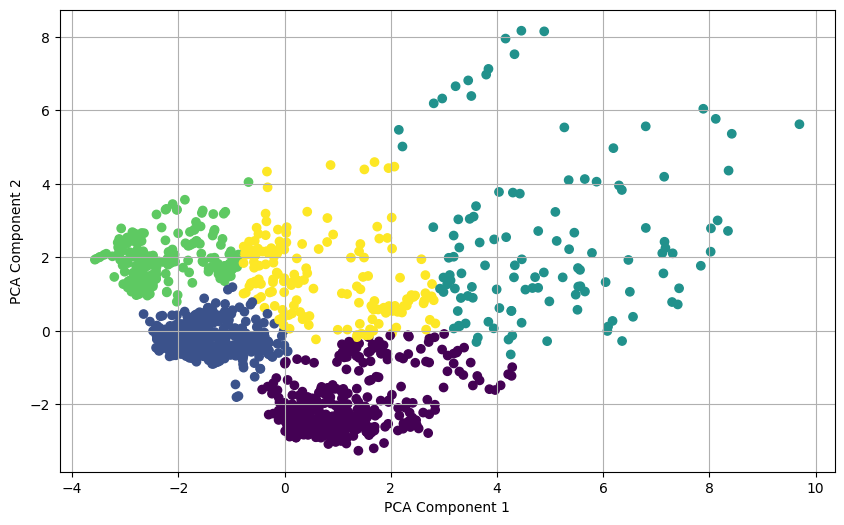

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.grid()
# plt.show()

miniBatchKmeans = cluster.MiniBatchKMeans(n_clusters=5)
miniBatchKmeans.fit(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=miniBatchKmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


## DBSCAN

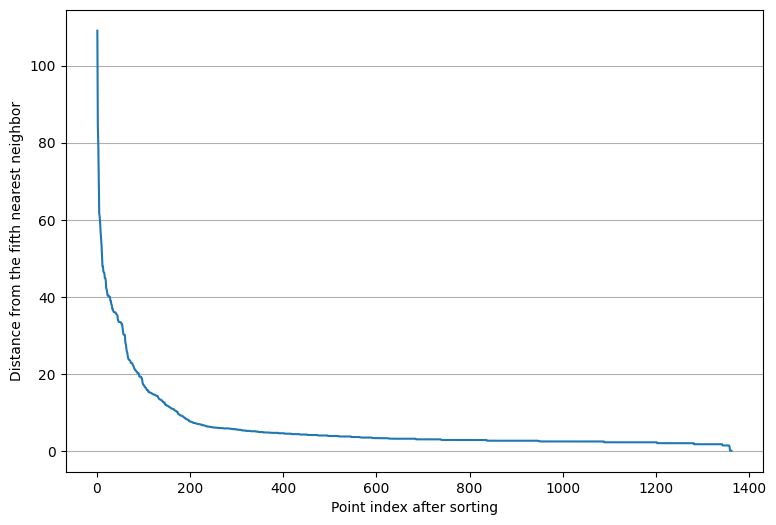

In [110]:
minPts = 4
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Point index after sorting')
plt.ylabel('Distance from the fifth nearest neighbor')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

#plt.xscale('log')

plt.grid(axis='y')

plt.show() 

In [113]:
from sklearn.cluster import DBSCAN
import plotly.express as px

pca = PCA(n_components=3)
eps = 15
minPts = 6

data_reduced_3d = pca.fit_transform(df)

dbs = DBSCAN(eps=eps, min_samples=minPts)

y_dbs = dbs.fit_predict(data_reduced_3d)

df_reduced_3d = pd.DataFrame(data=data_reduced_3d, columns=['PC1', 'PC2', 'PC3'])

df_reduced_3d['Cluster'] = y_dbs

fig = px.scatter_3d(df_reduced_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='DBSCAN Clustering (PCA-reduced 3D)')
fig.show()


In [114]:
pca = PCA(n_components=2)

eps = 15
minPts = 4

data_reduced_2d = pca.fit_transform(df)

dbs = DBSCAN(eps=eps, min_samples=minPts)

y_dbs = dbs.fit_predict(data_reduced_2d)

df_reduced_2d = pd.DataFrame(data=data_reduced_2d, columns=['PC1', 'PC2'])

df_reduced_2d['Cluster'] = y_dbs

fig = px.scatter(df_reduced_2d, x='PC1', y='PC2', color='Cluster', title='DBSCAN Clustering (PCA-reduced 2D)')
fig.show()


## Mean Shift

In [115]:
from sklearn.cluster import MeanShift


# Mean Shift clustering
mean_shift = MeanShift()
mean_shift.fit(scaled_data)
labels = mean_shift.labels_

# Dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
data_reduced_2d = pca.fit_transform(scaled_data)

# Visualize 2D
fig_2d = px.scatter(
    x=data_reduced_2d[:, 0], y=data_reduced_2d[:, 1], color=labels, 
    title="Mean Shift Clustering (2D PCA-reduced)", labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'}
)
fig_2d.show()

# Dimensionality reduction to 3D for visualization
pca = PCA(n_components=3)
data_reduced_3d = pca.fit_transform(scaled_data)

# Visualize 3D
fig_3d = px.scatter_3d(
    x=data_reduced_3d[:, 0], y=data_reduced_3d[:, 1], z=data_reduced_3d[:, 2], 
    color=labels, title="Mean Shift Clustering (3D PCA-reduced)",
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)
fig_3d.show()
